In [1]:
%matplotlib notebook
import os
import pandas as pd 
import math
import numpy as np 
import matplotlib.pyplot as plt
import random as r 
import glob

In [68]:
# grab simulation and predicted dataframes 
#############################################
# cols = ["eventID", "m1", "m2", "m3", "x1", "x2", "x3", "y1", "y2", "y3", "dx1", "dx2", "dx3", "dy1", 
#         "dy2", "dy3", "tEnd", "x1tEnd", "x2tEnd", "x3tEnd", "y1tEnd", "y2tEnd", "y3tEnd", 
#         "dx1tEnd", "dx2tEnd", "dx3tEnd", "dy1tEnd", "dy2tEnd", "dy3tEnd" ]
cols = ["eventID", "m1", "m2", "m3", "x1", "x2", "x3", "y1", "y2", "y3",
                                            "tEnd", "x1tEnd", "x2tEnd", "x3tEnd", "y1tEnd", "y2tEnd", "y3tEnd",
                                            "dx1tEnd", "dx2tEnd", "dx3tEnd", "dy1tEnd", "dy2tEnd", "dy3tEnd"]
simfilepath = "/nBodyData/julSim/julia_batch5_1.csv"
alf = [i for i in glob.glob(simfilepath)]
sdf = pd.concat([pd.read_csv(f, index_col=False) for f in alf],sort=False)


prediction = False # whether read nn file or nots
# nnfile = "/nBodyData/pred/predicted_paths_3_combined.csv"
nnfile = "/nBodyData/pred/predicted_paths_batch_3_1.csv"
dataCols = ["x1tEnd_p", "x2tEnd_p", "x3tEnd_p", "y1tEnd_p", "y2tEnd_p", "y3tEnd_p","eventID"]

pdf = sdf
if prediction:
    pdf = pd.read_csv(nnfile, names=dataCols)

In [69]:
pdf

,eventID,m1,m2,m3,x1,x2,x3,y1,y2,y3,...,x3tEnd,y1tEnd,y2tEnd,y3tEnd,dx1tEnd,dx2tEnd,dx3tEnd,dy1tEnd,dy2tEnd,dy3tEnd
0,5.100010e+09,150.0,120.0,130.0,-7.312715,6.948675,5.275492,-4.898619,-0.091298,-1.010179,...,5.275706,-4.898617,-0.091431,-1.010060,0.004756,-0.124626,0.109551,0.001524,-0.067922,0.060938
1,5.100010e+09,150.0,120.0,130.0,-7.312715,6.948675,5.275492,-4.898619,-0.091298,-1.010179,...,5.276348,-4.898608,-0.091829,-1.009703,0.009513,-0.249386,0.219226,0.003049,-0.135918,0.121945
2,5.100010e+09,150.0,120.0,130.0,-7.312715,6.948675,5.275492,-4.898619,-0.091298,-1.010179,...,5.277419,-4.898593,-0.092493,-1.009107,0.014269,-0.374414,0.329149,0.004573,-0.204061,0.183087
3,5.100010e+09,150.0,120.0,130.0,-7.312715,6.948675,5.275492,-4.898619,-0.091298,-1.010179,...,5.278920,-4.898572,-0.093423,-1.008272,0.019025,-0.499848,0.439447,0.006098,-0.272426,0.244434
4,5.100010e+09,150.0,120.0,130.0,-7.312715,6.948675,5.275492,-4.898619,-0.091298,-1.010179,...,5.280853,-4.898545,-0.094622,-1.007197,0.023780,-0.625826,0.550247,0.007622,-0.341090,0.306057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92224,5.100373e+09,150.0,120.0,130.0,-0.310026,9.710165,-5.307191,4.509304,-8.306395,-6.606117,...,-0.411277,-3.084240,2.122449,-7.470962,0.381680,2.802343,-3.027178,2.762796,-2.650940,-0.740820
92225,5.100373e+09,150.0,120.0,130.0,-0.310026,9.710165,-5.307191,4.509304,-8.306395,-6.606117,...,-0.423089,-3.073453,2.112079,-7.473836,0.370798,2.808446,-3.020255,2.759899,-2.658500,-0.730499
92226,5.100373e+09,150.0,120.0,130.0,-0.310026,9.710165,-5.307191,4.509304,-8.306395,-6.606117,...,-0.434873,-3.062678,2.101680,-7.476669,0.359936,2.814564,-3.013370,2.757027,-2.666080,-0.720188
92227,5.100373e+09,150.0,120.0,130.0,-0.310026,9.710165,-5.307191,4.509304,-8.306395,-6.606117,...,-0.446631,-3.051914,2.091250,-7.479462,0.349095,2.820697,-3.006522,2.754178,-2.673680,-0.709886


In [70]:
# combine dataframes
###############################################
pdf.eventID = pdf.eventID.astype(int)
pdf.sort_values(["eventID"], axis=0, ascending=True, inplace= True) 

mdf = pdf
if prediction:
    adf = pd.merge(left=sdf,right=pdf, on='eventID')
    mdf = adf.drop_duplicates(subset='eventID')

[510001 510002 510003 510004 510005 510006 510007 510008 510009 510010
 510011 510012 510013 510014 510015 510016 510017 510018 510019 510020
 510021 510022 510023 510024 510025 510026 510027 510028 510029 510030
 510031 510032 510033 510034 510035 510036 510037]


<IPython.core.display.Javascript object>


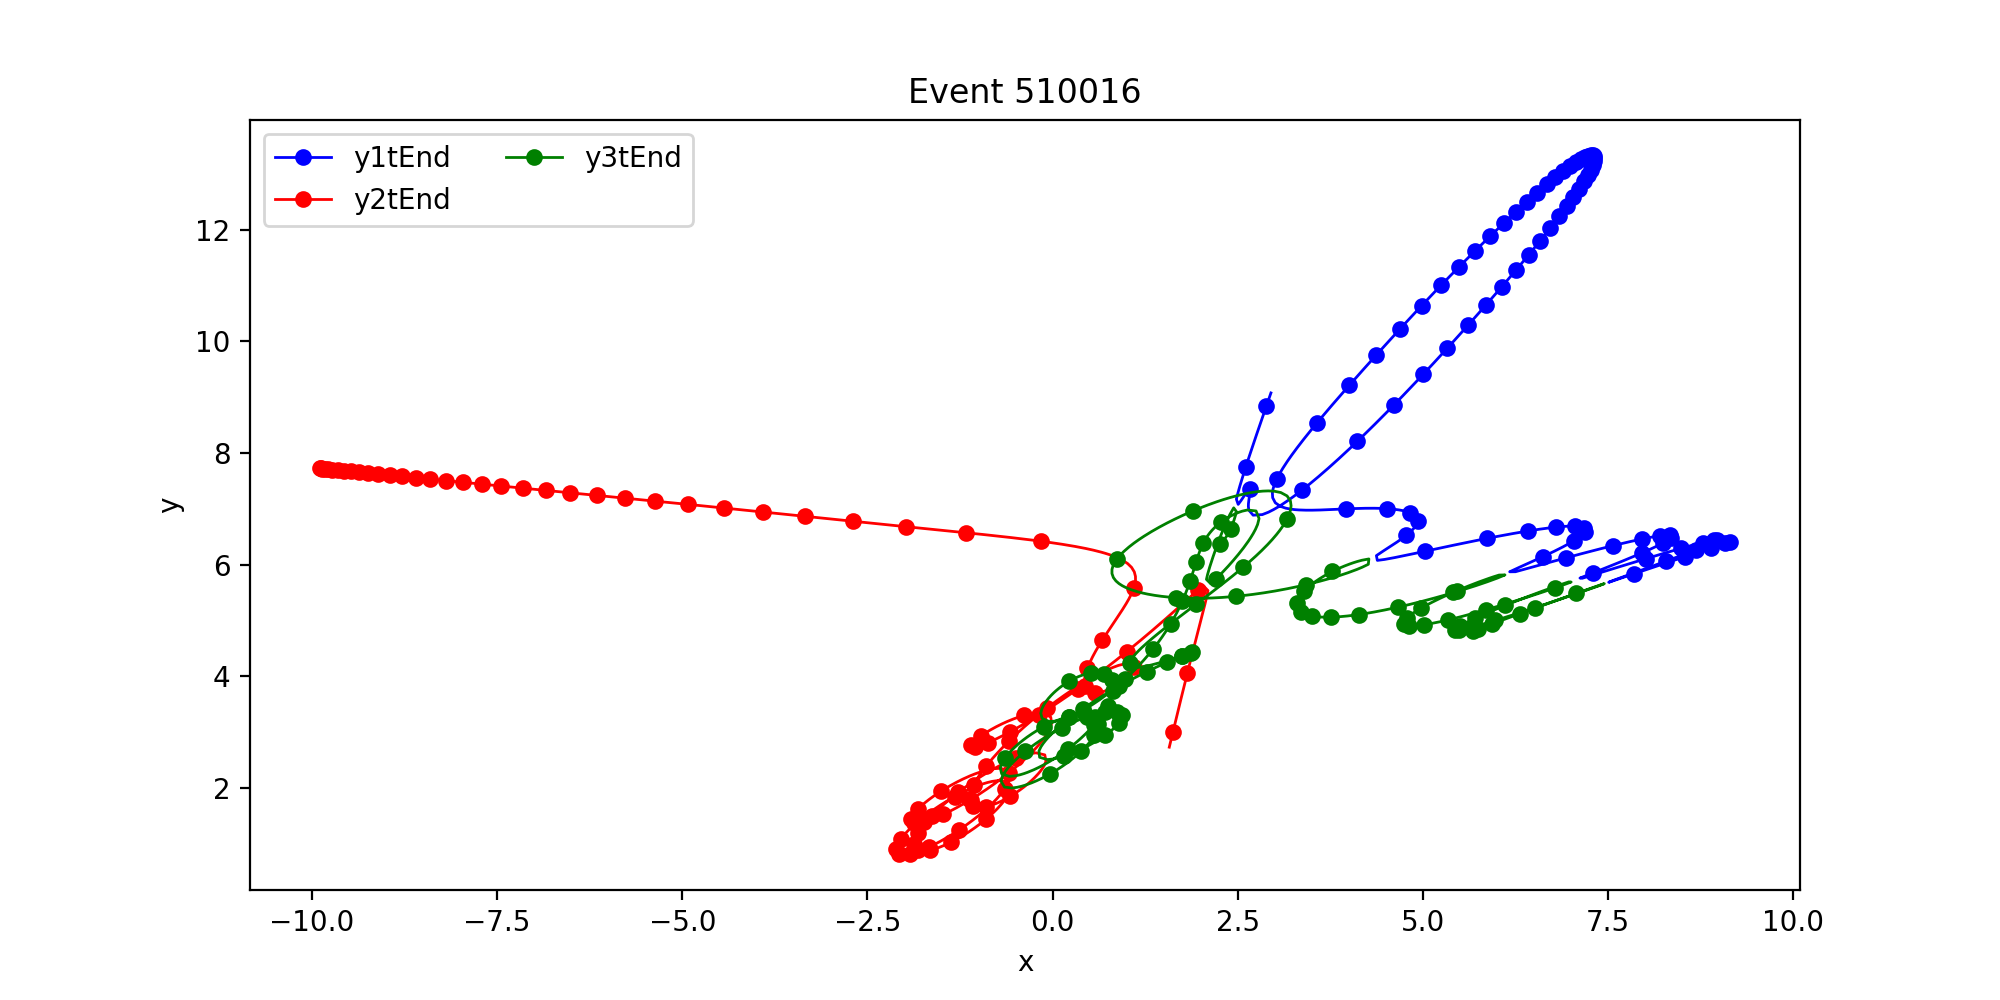

In [72]:
# plot an individual event
###############################################

# pick event to plot
r.seed(1)
indexArray = np.array(mdf['eventID'])
indexArray = np.unique((indexArray/10000).astype(int))
indexInt = np.random.choice(indexArray)
# indexInt = 310008
index = indexInt*10000
print(indexArray)

# plot event 
edf = mdf.loc[(mdf['eventID'] >= index) & (mdf['eventID'] <= (index+2560))]
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,5)

tsize = 5
ax.plot('x1tEnd', 'y1tEnd', data=edf, color='blue', marker='o',linewidth=1, markersize=tsize, markevery=30)
ax.plot('x2tEnd', 'y2tEnd', data=edf, color='red', marker='o',linewidth=1, markersize=tsize, markevery=30)
ax.plot('x3tEnd', 'y3tEnd', data=edf, color='green', marker='o',linewidth=1, markersize=tsize, markevery=30)

if prediction:
    ax.plot('x1tEnd_p', 'y1tEnd_p', data=edf, color='blue', marker='x', linestyle=':', linewidth=1, markersize=tsize, markevery=30)
    ax.plot('x2tEnd_p', 'y2tEnd_p', data=edf, color='red', marker='x', linestyle=':', linewidth=1, markersize=tsize, markevery=30)
    ax.plot('x3tEnd_p', 'y3tEnd_p', data=edf, color='green', marker='x', linestyle=':', linewidth=1, markersize=tsize, markevery=30)

plt.legend(loc='best', ncol=2, fancybox=True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Event {0}'.format(int(index/10000)))
plt.show()

In [15]:
# define possible metrics
#####################################

# barycenter
mdf['ibaryX'] = (mdf['m1']*mdf['x1']+mdf['m2']*mdf['x2']+mdf['m3']*mdf['x3'])/(mdf['m1']+mdf['m2']+mdf['m3'])
mdf['ibaryY'] = (mdf['m1']*mdf['y1']+mdf['m2']*mdf['y2']+mdf['m3']*mdf['y3'])/(mdf['m1']+mdf['m2']+mdf['m3'])
mdf['baryX'] = (mdf['m1']*mdf['x1tEnd']+mdf['m2']*mdf['x2tEnd']+mdf['m3']*mdf['x3tEnd'])/(mdf['m1']+mdf['m2']+mdf['m3'])
mdf['baryY'] = (mdf['m1']*mdf['y1tEnd']+mdf['m2']*mdf['y2tEnd']+mdf['m3']*mdf['y3tEnd'])/(mdf['m1']+mdf['m2']+mdf['m3'])
mdf['baryDiffX'] = np.abs(mdf['baryX']-mdf['ibaryX'])
mdf['baryDiffY'] = np.abs(mdf['baryY']-mdf['ibaryY'])


# energy



# moment of inertia
mdf['imomentX'] = mdf['m1']*(mdf['x1']**2) + mdf['m2']*(mdf['x2']**2) + mdf['m3']*(mdf['x3']**2)
mdf['momentX'] = mdf['m1']*(mdf['x1tEnd']**2) + mdf['m2']*(mdf['x2tEnd']**2) + mdf['m3']*(mdf['x3tEnd']**2)
mdf['imomentY'] = mdf['m1']*(mdf['y1']**2) + mdf['m2']*(mdf['y2']**2) + mdf['m3']*(mdf['y3']**2)
mdf['momentY'] = mdf['m1']*(mdf['y1tEnd']**2) + mdf['m2']*(mdf['y2tEnd']**2) + mdf['m3']*(mdf['y3tEnd']**2)
mdf['momentDiffX'] = np.abs(mdf['momentX']-mdf['imomentX'])
mdf['momentDiffY'] = np.abs(mdf['momentY']-mdf['imomentY'])


# momentum/angular momentum


# plot nn vars only if loaded
if prediction:
    mdf['baryX_p'] = (mdf['m1']*mdf['x1tEnd_p']+mdf['m2']*mdf['x2tEnd_p']+mdf['m3']*mdf['x3tEnd_p'])/(mdf['m1']+mdf['m2']+mdf['m3'])
    mdf['baryY_p'] = (mdf['m1']*mdf['y1tEnd_p']+mdf['m2']*mdf['y2tEnd_p']+mdf['m3']*mdf['y3tEnd_p'])/(mdf['m1']+mdf['m2']+mdf['m3'])
    mdf['baryDiffX_p'] = np.abs(mdf['baryX_p']-mdf['ibaryX'])
    mdf['baryDiffY_p'] = np.abs(mdf['baryY_p']-mdf['ibaryY'])
    mdf['momentDiffX_p'] = np.abs(mdf['momentX_p']-mdf['imomentX'])
    mdf['momentDiffY_p'] = np.abs(mdf['momentY_p']-mdf['imomentY'])
    mdf['momentX_p'] = mdf['m1']*(mdf['x1tEnd_p']**2) + mdf['m2']*(mdf['x2tEnd_p']**2) + mdf['m3']*(mdf['x3tEnd_p']**2)
    mdf['momentY_p'] = mdf['m1']*(mdf['y1tEnd_p']**2) + mdf['m2']*(mdf['y2tEnd_p']**2) + mdf['m3']*(mdf['y3tEnd_p']**2)

10000


<IPython.core.display.Javascript object>


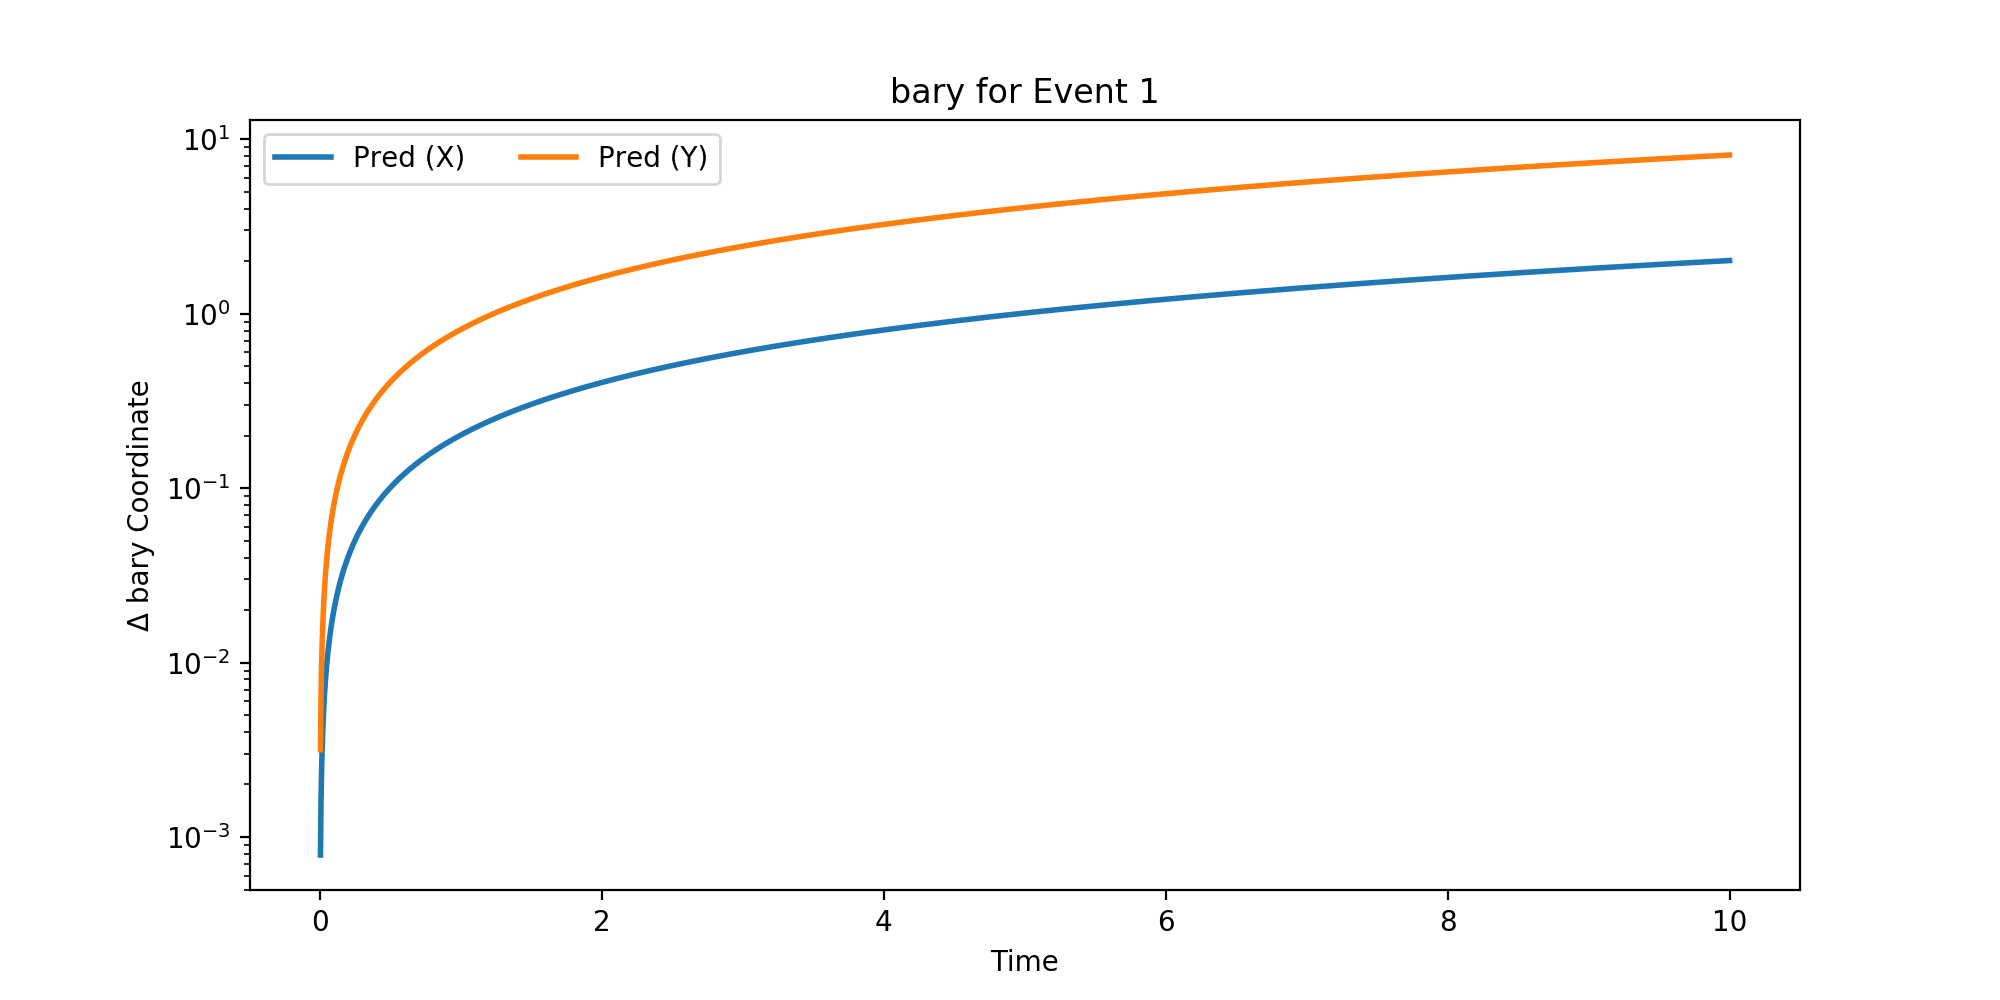

In [37]:
# plot metric (for all or 1 event)
####################################
singleEvent = True
metric = "bary" # currently availible metrics: bary, moment

# pick event to plot
r.seed(1)
indexArray = np.array(mdf['eventID'])
indexArray = np.unique((indexArray/10000).astype(int))
index = np.random.choice(indexArray)*10000
print(index)
ddf = mdf
edf = mdf.loc[(mdf['eventID'] >= index) & (mdf['eventID'] <= (index+2560))]
if singleEvent: ddf = edf

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,5)

bsize = 1
lsize = 0
if singleEvent: 
    bsize = 0
    lsize = 2

if prediction:
    ax.plot('tEnd', '{0}DiffX_p'.format(metric), data=ddf, markersize=bsize, marker='o', linewidth=lsize)
    ax.plot('tEnd', '{0}DiffY_p'.format(metric), data=ddf, markersize=bsize, marker='o', linewidth=lsize)

ax.plot('tEnd', '{0}DiffX'.format(metric), data=ddf, markersize=bsize, marker='o', linewidth=lsize)
ax.plot('tEnd', '{0}DiffY'.format(metric), data=ddf, markersize=bsize, marker='o', linewidth=lsize)

ax.set_yscale('log')
plt.xlabel('Time')
plt.ylabel('Δ {0} Coordinate'.format(metric))
if singleEvent: plt.title("{0} for Event {1}".format(metric,int(index/10000)))
else: plt.title("{0} for All events".format(metric))
plt.legend(("Pred (X)", "Pred (Y)", "Sim (X)", "Sim (Y)"),loc='best', ncol=2, fancybox=True)
# plt.show()